In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [258]:
from tensorflow import keras

In [259]:
# load the data
df = pd.read_csv('lending_club_loan_clean.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 80 columns):
loan_amnt                              395219 non-null float64
term                                   395219 non-null int64
int_rate                               395219 non-null float64
installment                            395219 non-null float64
annual_inc                             395219 non-null float64
dti                                    395219 non-null float64
open_acc                               395219 non-null float64
pub_rec                                395219 non-null float64
revol_bal                              395219 non-null float64
revol_util                             395219 non-null float64
total_acc                              395219 non-null float64
mort_acc                               395219 non-null float64
pub_rec_bankruptcies                   395219 non-null float64
A2                                     395219 non-null int64
A3         

In [260]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,22690,29597,30723,48052,70466,86630,93700,earliest_cr_line_month,earliest_cr_line_year,loan_repaid
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,1,0,0,0,0,0,0,6,1990,1
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,0,0,0,0,0,0,0,7,2004,1
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,0,0,0,0,0,0,0,8,2007,1
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,9,2006,1
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,0,0,0,0,0,0,3,1999,0


In [261]:
# use .sample() to grab a sample of the 390k+ entries to save time on training
print(len(df))
df = df.sample(frac=0.1, random_state=101)
print(len(df))

395219
39522


In [262]:
"""features and target"""
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [263]:
"""Split the data"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [264]:
"""Scaling"""
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

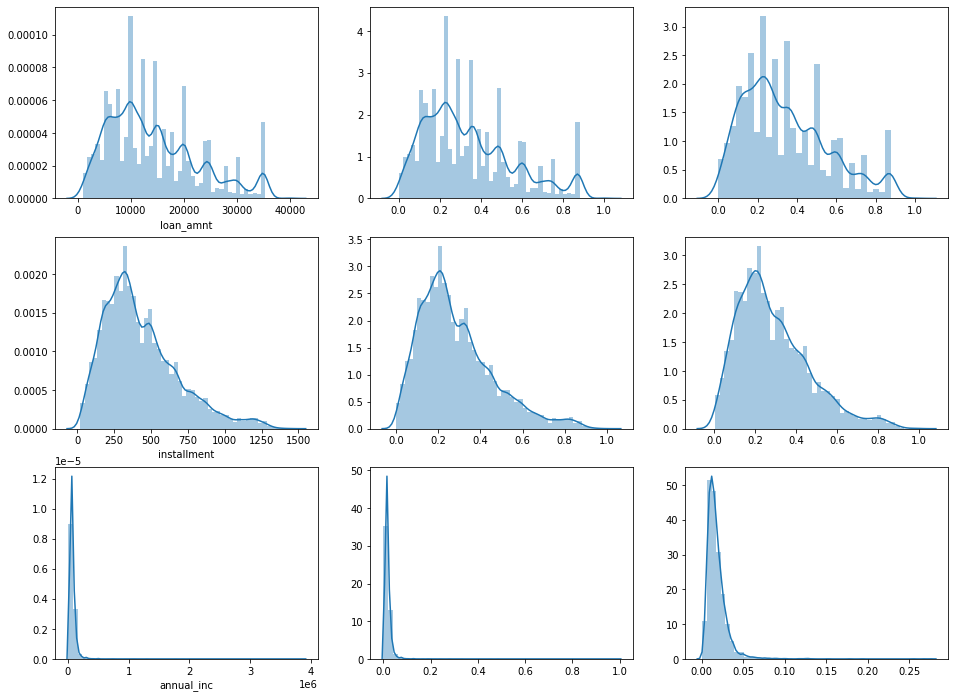

In [265]:
# visualize the data distribution before and after scaling
sample_cols = [0, 3, 4]
plt.figure(figsize=(16,12))
for i in range(3):
    col = sample_cols[i]
    ax = plt.subplot(3, 3, 3*i+1)
    sns.distplot(df.iloc[:, col])
    ax = plt.subplot(3, 3, 3*i+2)
    sns.distplot(X_train[:, col])
    ax = plt.subplot(3, 3, 3*i+3)
    sns.distplot(X_test[:, col])

In [266]:
"""Creating the model"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [267]:
# check shape of the dataset: number of records, number of features
X.shape

(39522, 79)

In [268]:
model_ann = Sequential()

# input layer
model_ann.add(Dense(79, activation='relu'))
model_ann.add(Dropout(0.5))

# hidden layer
model_ann.add(Dense(40, activation='relu'))
model_ann.add(Dropout(0.5))

# # hidden layer
# model_ann.add(Dense(20, activation='relu'))
# model_ann.add(Dropout(0.5))

# output layer
model_ann.add(Dense(units=1, activation='sigmoid'))

# compile the model
model_ann.compile(loss='binary_crossentropy', optimizer='adam')

In [269]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [270]:
model_ann.fit(x=X_train,
              y=y_train,
              epochs=100,
              batch_size=256,
              validation_data=(X_test, y_test),
              callbacks=[early_stop])

Train on 31617 samples, validate on 7905 samples
Epoch 1/100
31617/31617 [==============================] - 1s 39us/sample - loss: 0.5042 - val_loss: 0.3924
Epoch 2/100
31617/31617 [==============================] - 1s 18us/sample - loss: 0.3827 - val_loss: 0.3154
Epoch 3/100
31617/31617 [==============================] - 1s 18us/sample - loss: 0.3252 - val_loss: 0.2911
Epoch 4/100
31617/31617 [==============================] - 1s 17us/sample - loss: 0.3011 - val_loss: 0.2828
Epoch 5/100
31617/31617 [==============================] - 1s 18us/sample - loss: 0.2918 - val_loss: 0.2791
Epoch 6/100
31617/31617 [==============================] - 1s 18us/sample - loss: 0.2835 - val_loss: 0.2770
Epoch 7/100
31617/31617 [==============================] - 1s 18us/sample - loss: 0.2807 - val_loss: 0.2749
Epoch 8/100
31617/31617 [==============================] - 1s 18us/sample - loss: 0.2777 - val_loss: 0.2736
Epoch 9/100
31617/31617 [==============================] - 1s 17us/sample - loss: 0.275

In [271]:
"""Saving the model"""
model_ann.save('sample0.1_model_ann.h5')

In [ ]:
"""Loading the model if necessary"""
# back to this later

<AxesSubplot:>

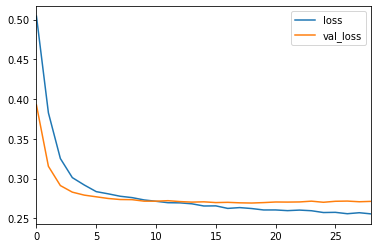

In [273]:
"""Evaluating model performance"""
losses = pd.DataFrame(model_ann.history.history)
losses.plot()

In [274]:
from sklearn.metrics import classification_report, confusion_matrix
pred = model_ann.predict_classes(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.47      0.62      1570
           1       0.88      0.98      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.88      0.73      0.77      7905
weighted avg       0.88      0.88      0.87      7905



In [275]:
print('test_pos:', y_test.sum())
print('test_neg:', len(y_test) - y_test.sum())

test_pos: 6335
test_neg: 1570


Text(87.0, 0.5, 'Truth')

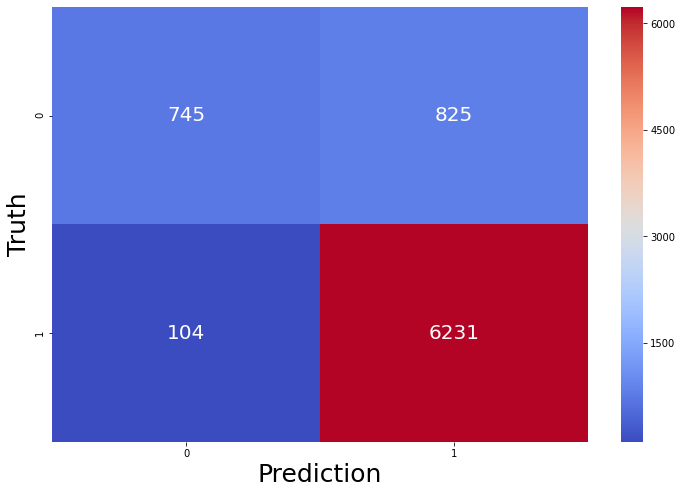

In [276]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='coolwarm', annot_kws={"fontsize":20})
plt.xlabel('Prediction', fontsize=25)
plt.ylabel('Truth', fontsize=25)

"""
Interpretation of the results:
The company makes profit from interrest earned from an issued loan when it's fully paid but loses money when it's charged off.
TP: customers will pay fully and they are issued with the loan - interest earn
FP: customers will be charged off but are issued with the loan - loss
TN: customers will to be charged off and they are not issued with the loan - no profit, no loss
FN: customers will pay fully but they are not issued with the loan - lose some potential profit

We are most interested in TP (the higher the better) and FP (the lower the better) as they are most relevant to earning.
However there could also be a balance between the earned interest and the part being charged off,.
The company may still issue the loan if the potential part being charged off is less than the interest earned in previous installment.
Or on the contrary, the company may not issue the loan when the part being charged off outweights the interest earned.
Right now we are only modeling with the binary_crossentropy for classification 
but in reality the company may have a customized metrics for maximizing the potential profit instead of the accuracy for classification.
"""

In [277]:
"""Hyperparameters tunning"""
# create a function to build models given a set of hyperparameter
def build_model(n_hidden=1, n_neurons=39, drop_rate=0.2, learning_rate=1e-3):
    # input layer
    model = Sequential()
    model.add(Dense(79, activation='relu'))
    model.add(Dropout(drop_rate))
    # hidden layer
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation='relu'))
        model.add(Dropout(drop_rate))
    # output layer
    model.add(Dense(1, activation='sigmoid'))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model

In [278]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
# Use a random search as there are too many combinations of hyperparameters
from scipy import reciprocal
from sklearn.model_selection import RandomizedSearchCV

params_dist = {
    'n_hidden': [0,1,2],
    'n_neurons': [10, 20, 40],
    # 'drop_rate': [0, 0.1, 0.2, 0.3, 0.4, 0.5]
    #'learning_rate': reciprocal([3e-4, 3e-2])
}

rnd_search_cv = RandomizedSearchCV(keras_reg, 
                                   params_dist, 
                                   n_iter=10, 
                                   cv=3,
                                   random_state=101,
                                   verbose=1)
rnd_search_cv.fit(X=X_train,
                  y=y_train,
                  epochs=100,
                  batch_size=256,
                  validation_data=(X_test, y_test),
                  callbacks=[early_stop])

# explored several structures:
# no hidden layer
# one hidden layer
# two hidden layers
# all structures present similar accuracy around 0.88

In [280]:
# customized model structure exploration and hyperparameter tunning
def build_model(n_neurons1=39, n_neurons2=19, drop_rate=0.2, learning_rate=1e-3):
    # input layer
    model = Sequential()
    model.add(Dense(79, activation='relu'))
    model.add(Dropout(drop_rate))
    
    # hidden layer
    model.add(Dense(n_neurons1, activation='relu'))
    model.add(Dropout(drop_rate))
    
    # hidden layer
    model.add(Dense(n_neurons2, activation='relu'))
    model.add(Dropout(drop_rate))
    
    # output layer
    model.add(Dense(1, activation='sigmoid'))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model

In [ ]:
acc = []
for i in range(9,40, 10):
    for j in range(9, 40, 10):
        model = build_model(n_neurons1=i, n_neurons2=j)
        model.fit(x=X_train,
                  y=y_train,
                  epochs=100,
                  batch_size=256,
                  validation_data=(X_test, y_test),
                  callbacks=[early_stop])
        pred = model.predict_classes(X_test)
        acc.append([i, j, accuracy_score(y_test, pred)])

acc
[[9, 9, 0.8827324478178368],
 [9, 19, 0.883617963314358],
 [9, 29, 0.8827324478178368],
 [9, 39, 0.8823529411764706],
 [19, 9, 0.883111954459203],
 [19, 19, 0.8817204301075269],
 [19, 29, 0.8833649588867806],
 [19, 39, 0.880708412397217],
 [29, 9, 0.8823529411764706],
 [29, 19, 0.8828589500316255],
 [29, 29, 0.883111954459203],
 [29, 39, 0.8780518659076534],
 [39, 9, 0.8823529411764706],
 [39, 19, 0.882605945604048],
 [39, 29, 0.8804554079696395],
 [39, 39, 0.8839974699557243]]
 All structures tested, combined with hyperparameter tunning presented the similar accuracy around 0.88.

In [290]:
"""Feature importance"""
"""Permutaion importance for non sklearn models"""
# We will need to create a wrapper for our score function to calculate our evaluation metric.
from sklearn.metrics import accuracy_score
#define a score function. In this case I use accuracy
def score(X, y):
    y_pred = model_ann.predict_classes(X)
    return accuracy_score(y, y_pred)

from eli5.permutation_importance import get_score_importances
# This function takes only numpy arrays as inputs
base_score, score_decreases = get_score_importances(score, X_train, y_train)
feature_importances = np.mean(score_decreases, axis=0)

In [292]:
feature_importances.shape

(79,)

In [294]:
feature_importances

array([-1.26514217e-04,  2.40377012e-04,  1.39165639e-04, -2.02422747e-04,
        3.16285543e-05,  1.20188506e-04,  5.69313977e-05,  0.00000000e+00,
        2.22044605e-17,  7.59085302e-05,  3.79542651e-05,  1.70794193e-04,
        6.32571085e-06,  1.89771326e-05,  1.26514217e-05, -1.89771326e-05,
       -6.32571085e-06,  1.89771326e-05,  6.32571085e-06, -3.79542651e-05,
        2.53028434e-05, -6.32571085e-06,  3.16285543e-05,  6.32571085e-06,
       -1.89771326e-05,  1.89771326e-05, -1.89771326e-05, -1.26514217e-05,
        1.26514217e-05,  7.59085302e-05, -3.16285543e-05,  3.16285543e-05,
       -1.89771326e-05,  5.69313977e-05, -1.89771326e-05,  3.79542651e-05,
       -7.59085302e-05, -6.32571085e-06,  5.69313977e-05,  3.16285543e-05,
        1.83445615e-04, -6.32571085e-06,  8.85599519e-05, -3.16285543e-05,
        6.32571085e-06,  0.00000000e+00,  0.00000000e+00,  1.26514217e-04,
        1.26514217e-05, -1.89771326e-05,  6.32571085e-06, -5.06056868e-05,
        1.45491350e-04,  

In [327]:
sum(feature_importances)

0.14034854666793314

In [ ]:
feature_importance_dict = {}
for i, feature_name in enumerate(df.columns[:-1]):
    feature_importance_dict[feature_name]=feature_importances[i]

In [386]:
dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:10])

{'93700': 0.042983205237688636,
 '86630': 0.039592624221146885,
 '11650': 0.03941550431729768,
 '05113': 0.008520732517316642,
 '29597': 0.007698390106588238,
 'term': 0.0002403770123668103,
 'F4': 0.0001834456147010055,
 'RENT': 0.0001834456147010055,
 'purpose_other': 0.000170794192997481,
 'earliest_cr_line_month': 0.000170794192997481}

In [356]:
fi_ann = np.array(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))
df_fi_ann = pd.DataFrame(fi_ann, columns=['feature','importance'])
df_fi_ann['importance'] = df_fi_ann['importance'].astype('float')

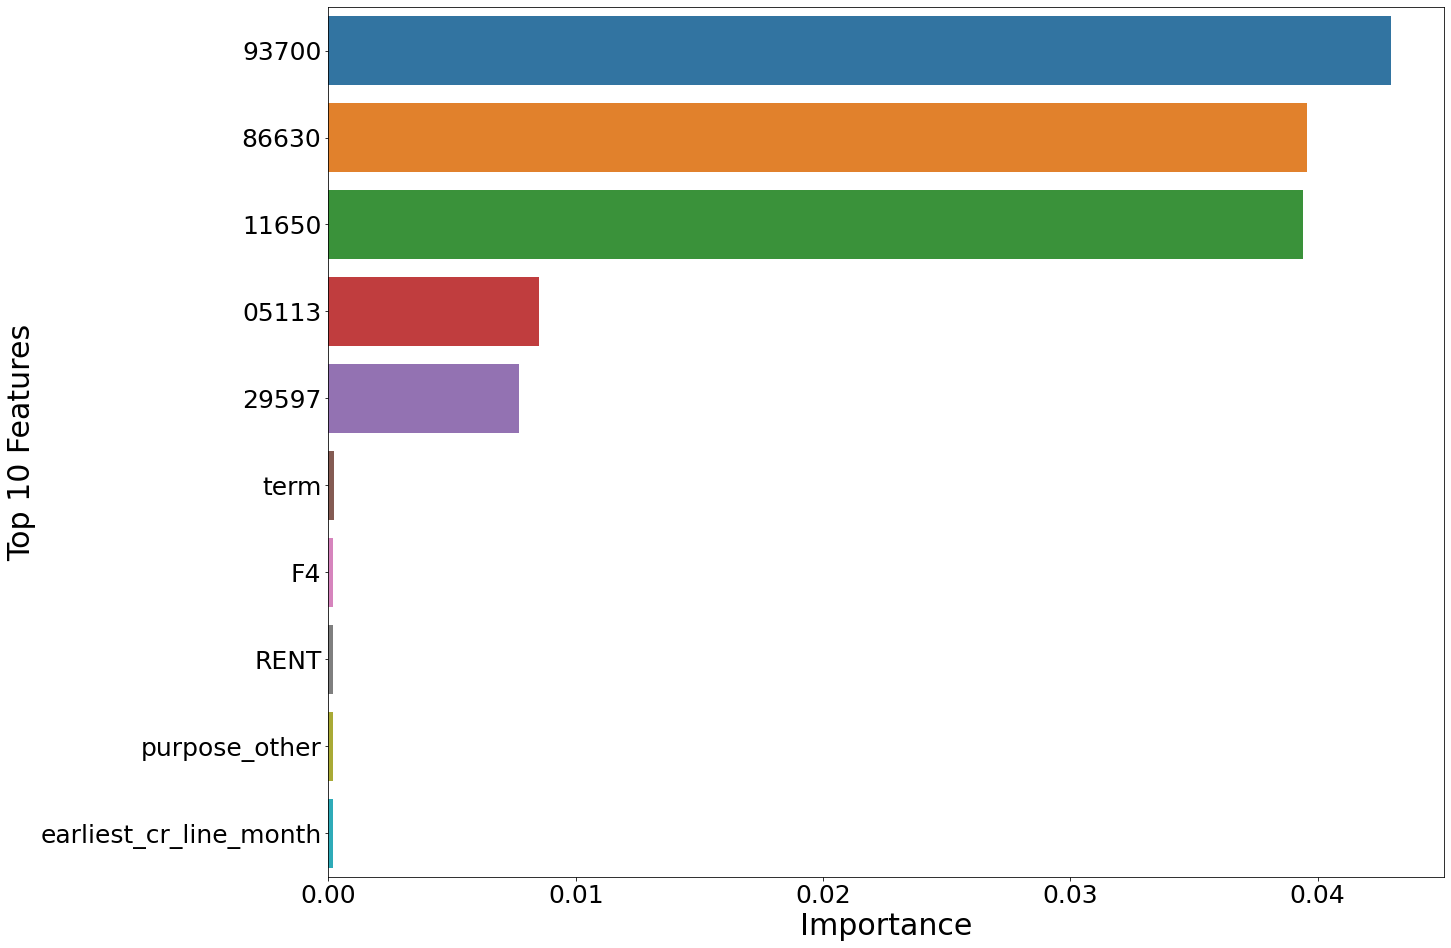

In [357]:
# create a horizontal barplot
fig = plt.figure(figsize=(20,16))
sns.barplot(data=df_fi_ann.iloc[:10,:], y='feature', x='importance')
plt.xlabel('Importance', fontsize=30)
plt.ylabel('Top 10 Features', fontsize=30)
plt.tick_params(axis='both', labelsize=25)

In [395]:
df['loan_repaid'].value_counts()

1    31664
0     7858
Name: loan_repaid, dtype: int64

              precision    recall  f1-score   support

           0       0.97      0.43      0.60      1570
           1       0.88      1.00      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.93      0.71      0.77      7905
weighted avg       0.90      0.88      0.87      7905



Text(87.0, 0.5, 'Truth')

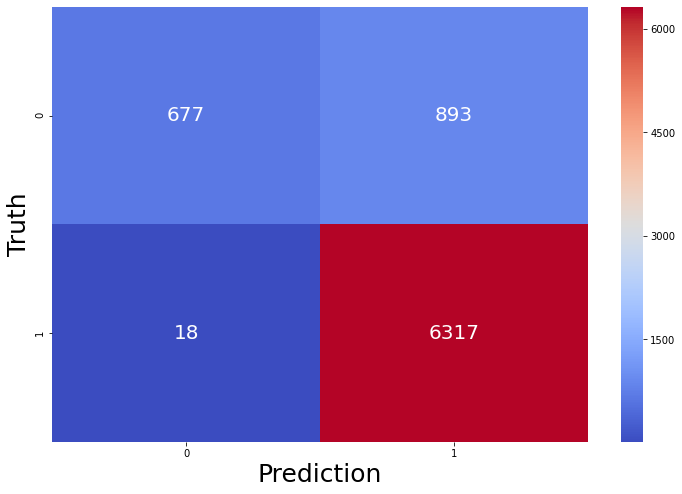

In [396]:
"""Permutation Importance for sklearn models"""
from sklearn.ensemble import RandomForestClassifier

"""Weighted loss for imbalanced sample"""
penalty = {0: 4, 1: 1}
model_rfc = RandomForestClassifier(n_estimators=100, random_state=101, class_weight=penalty).fit(X_train, y_train)

pred_rfc = model_rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, pred_rfc), annot=True, fmt='d', cmap='coolwarm', annot_kws={"fontsize":20})
plt.xlabel('Prediction', fontsize=25)
plt.ylabel('Truth', fontsize=25)

In [397]:
import eli5
from eli5.sklearn import PermutationImportance
perm_rfc = PermutationImportance(model_rfc, random_state=101).fit(X_test, y_test)

In [398]:
eli5.show_weights(perm_rfc, feature_names = df.columns[:-1].tolist())

Weight,Feature
0.0435 ± 0.0043,11650
0.0428 ± 0.0037,93700
0.0407 ± 0.0015,86630
0.0059 ± 0.0008,29597
0.0056 ± 0.0013,05113
0.0014 ± 0.0008,dti
0.0013 ± 0.0011,term
0.0012 ± 0.0014,annual_inc
0.0012 ± 0.0007,revol_util
0.0012 ± 0.0004,int_rate


In [364]:
"""Feature Selection"""
from sklearn.feature_selection import SelectFromModel

# with 5-fold cross validation
perm = PermutationImportance(RandomForestClassifier(), cv=5)
perm.fit(X, y)

# perm.feature_importances_ attribute is now available, it can be used for feature selection
# let's e.g. select features which increase accuracy by at least 0.01 (or other threshold of own choice):
sel = SelectFromModel(perm, threshold=0.01, prefit=True)
sel

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.


SelectFromModel(estimator=PermutationImportance(cv=5,
                                                estimator=RandomForestClassifier(bootstrap=True,
                                                                                 class_weight=None,
                                                                                 criterion='gini',
                                                                                 max_depth=None,
                                                                                 max_features='auto',
                                                                                 max_leaf_nodes=None,
                                                                                 min_impurity_decrease=0.0,
                                                                                 min_impurity_split=None,
                                                                                 min_samples_leaf=1,
                                  

In [367]:
X_trans = sel.transform(X_train)
X_trans.shape

(31617, 3)

              precision    recall  f1-score   support

           0       1.00      0.41      0.58      1570
           1       0.87      1.00      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.94      0.71      0.76      7905
weighted avg       0.90      0.88      0.86      7905



Text(87.0, 0.5, 'Truth')

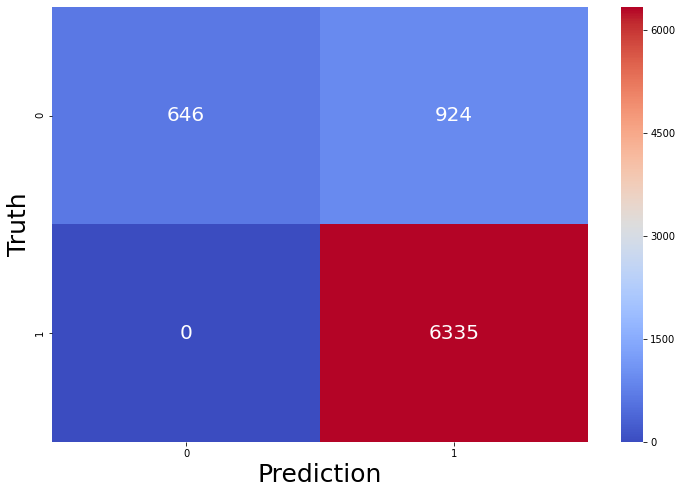

In [369]:
"""Performance of model with feature selection"""
model_rfc_sel = RandomForestClassifier(n_estimators=100, random_state=101).fit(X_trans, y_train)

pred_rfc_sel = model_rfc_sel.predict(sel.transform(X_test))
print(classification_report(y_test, pred_rfc_sel))
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, pred_rfc_sel), annot=True, fmt='d', cmap='coolwarm', annot_kws={"fontsize":20})
plt.xlabel('Prediction', fontsize=25)
plt.ylabel('Truth', fontsize=25)

In [380]:
"""Shap Values"""
import shap

# Using 31617 background data samples could cause slower run times. 
# Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.

# load JS visualization code to notebook
shap.initjs()

x_sample = shap.sample(X_train, 300)
# explain the model's predictions using SHAP
# there are other explainers for different types of models 
explainer = shap.KernelExplainer(model_ann, data=x_sample)

Using 300 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [381]:
shap_values = explainer.shap_values(x_sample)

  0%|          | 0/300 [00:00<?, ?it/s]

In [383]:
shap_values[0].shape

(300, 79)

In [387]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0][0,:], x_sample[0,:])

In [388]:
# add feature names to the sample
sample = pd.DataFrame(data=x_sample, columns=df.columns[:-1])
sample

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_line_month,earliest_cr_line_year
0,0.102564,0.0,0.350993,0.103599,0.021103,0.046743,0.044944,0.000000,0.001838,0.445904,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.363636,0.830769
1,0.307692,0.0,0.149981,0.272721,0.023927,0.102851,0.123596,0.052632,0.013029,0.535549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.454545,0.646154
2,0.080128,0.0,0.100896,0.073918,0.012888,0.172882,0.123596,0.000000,0.012829,0.354714,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.636364,0.753846
3,0.179487,0.0,0.119595,0.159646,0.024440,0.127631,0.101124,0.052632,0.005411,0.465997,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.723077
4,0.025641,0.0,0.437476,0.033339,0.006161,0.172302,0.191011,0.000000,0.013615,0.344668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.818182,0.892308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.461538,0.0,0.027659,0.386883,0.036506,0.193105,0.146067,0.000000,0.058670,0.285162,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.818182,0.430769
296,0.301282,1.0,0.571484,0.219280,0.006983,0.246809,0.134831,0.000000,0.020636,0.522411,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.818182,0.876923
297,0.153846,0.0,0.356058,0.151759,0.020589,0.093569,0.134831,0.000000,0.009261,0.336167,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.545455,0.846154
298,0.061538,0.0,0.298792,0.063780,0.007240,0.232057,0.078652,0.000000,0.006392,0.397218,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.272727,0.784615


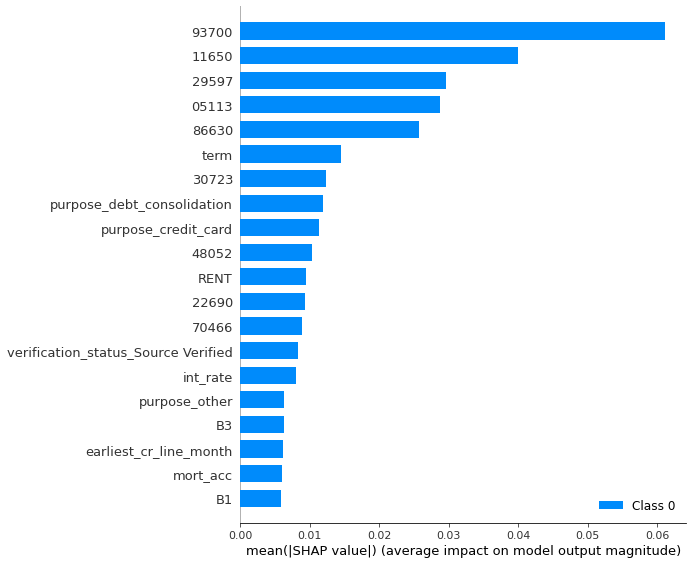

In [389]:
shap.summary_plot(shap_values, sample, plot_type="bar")

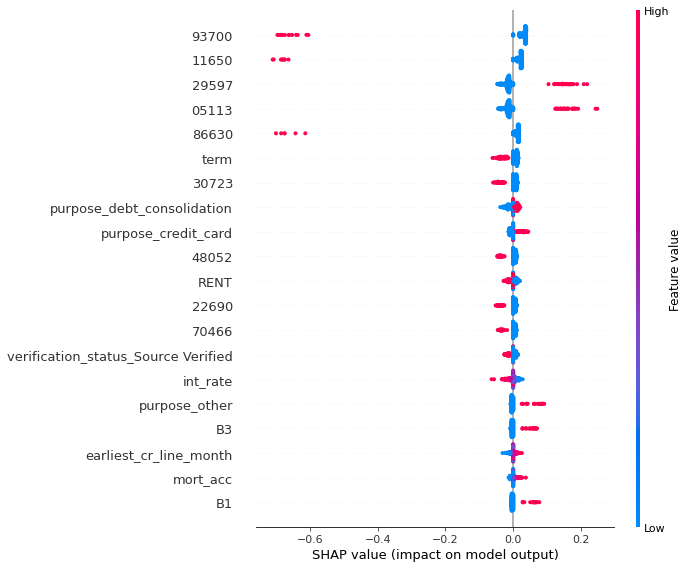

In [390]:
shap.summary_plot(shap_values[0], sample)

In [393]:
# check the results of feature importance
df.groupby(['93700', 'loan_repaid'])['93700', 'loan_repaid'].count()

93700  loan_repaid
93700 loan_repaid                    
0     0             6694         6694
      1            31664        31664
1     0             1164         1164

In [394]:
df.groupby(['11650', 'loan_repaid'])['11650', 'loan_repaid'].count()

11650  loan_repaid
11650 loan_repaid                    
0     0             6769         6769
      1            31664        31664
1     0             1089         1089

100% charged off when zip_code is 93700 or 11650!